# Code

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

## Least Squares

- Creating wave (`Wave`) from the `mglearn` library
- Generates the features `X` and the labels `y` and returns them to the caller

In [6]:
def make_wave(n_samples: int = 100) -> tuple[np.ndarray, np.ndarray]:
	rnd: np.random.RandomState = np.random.RandomState(42)
	x: np.ndarray = rnd.uniform(-3, 3, size=n_samples) 
	y_no_noise: np.ndarray = (np.sin(4 * x) + x) 
	y: np.ndarray = (y_no_noise + rnd.normal(size=len(x))) / 2
	return x.reshape(-1, 1), y # X, y

- Generated wave data `X` and `y` from `make_wave()` are assigned to features `X` and labels `y` 

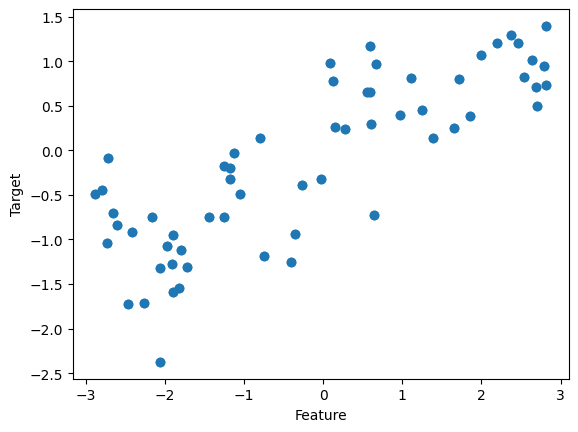

In [13]:
X, y = make_wave(n_samples=60)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.plot(X, y, 'o')
plt.scatter(X, y)

- Splitting data into training and tests sets
- Fitting a linear model to the training set

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
lr = LinearRegression().fit(X_train, y_train)

- Estimated coefficients

In [25]:
lr.coef_

array([0.44153666])

In [21]:
lr.intercept_

-0.01711124414733381

### Score / Model Performance

In [23]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6592061059587275
0.6932519118518162


In [26]:
X_train_ext = np.concatenate([X_train, X_train ** 2], axis=1) # concatenate X_train and X_train ** 2
X_test_ext = np.concatenate([X_test, X_test ** 2], axis=1) # concatenate the original feature with the squared feature

In [27]:
lr = LinearRegression().fit(X_train_ext, y_train)
y_hat = lr.predict(X_test_ext)

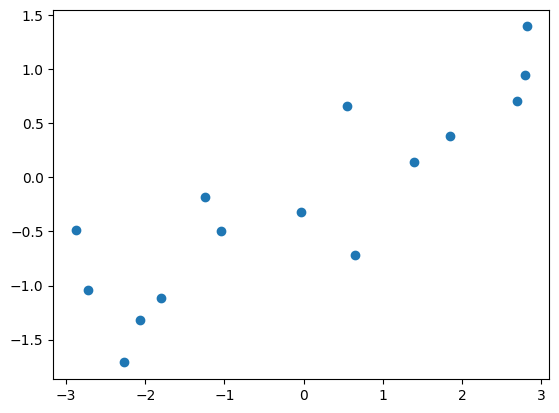

In [29]:
%matplotlib inline
plt.scatter(X_test, y_test)

## Overfitting data

In [30]:
print(lr.score(X_train_ext, y_train)) 
print(lr.score(X_test_ext, y_test))

0.6601817319830376
0.6861923283484095


- To get a clear instance of overfitting, a more complex dataset is required, namely the Boston Housing dataset
- To make the linear model more powerful:
  - Expand this dataset using the 13 original features
  - Look at all products (interactions) between features

In [34]:
def load_extended_boston() -> tuple[np.ndarray, np.ndarray]:
	boston = load_boston()
	X = MinMaxScaler().fit_transform(boston.data)
	X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
	return X, boston.target

In [36]:
X, y = load_extended_boston()
X.shape

/home/maruf/.cache/pypoetry/virtualenvs/anaconda-pOKeClin-py3.10/lib64/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternati

(506, 104)

- Building linear regression model

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [38]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.952051960903273
0.6074721959665879


## Ridge Regression

In [39]:
from sklearn.linear_model import Ridge

In [40]:
ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train))

0.8857966585170941


In [42]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7882787115369614
0.6359411489177309


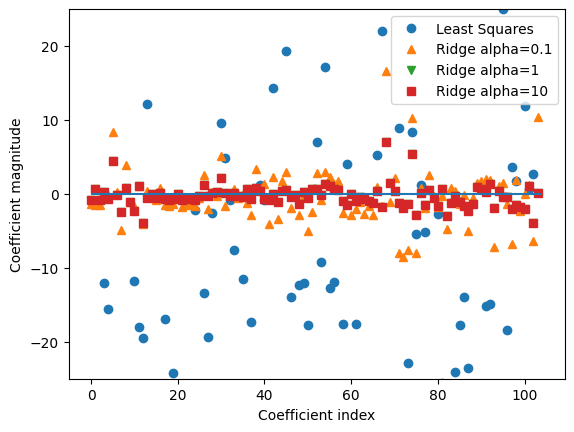

In [44]:
plt.plot(lr.coef_, 'o', label="Least Squares")
plt.plot(ridge.coef_, '^', label="Ridge alpha=0.1")
plt.plot(ridge10.coef_, 'v', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## Lasso

In [45]:
from sklearn.linear_model import Lasso

In [47]:
lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.29323768991114607
0.20937503255272294


In [48]:
np.sum(lasso.coef_ != 0)

4

In [49]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))

0.8962226511086497


In [50]:
print(np.sum(lasso001.coef_ != 0))

33


In [51]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(lasso00001.score(X_train, y_train))
print(np.sum(lasso00001.coef_ != 0))

0.9507158754515463
96
